In [97]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from scipy.special import expit

In [98]:
def function(x):
    nof=2
    sol=np.zeros(nof)
    f1=4*x[0]**2 +4*x[1]**2
    f2=(x[0]-5)**2+(x[1]-5)**2
    sol[0]=f1
    sol[1]=f2
    return sol
def res(x):
    statu=None
    g1=(x[0]-5)**2+x[1]**2 #<=25
    g2=(x[0]-8)**2+(x[1]+3)**2 #>=7.7
    if g1<=25 and g2>=7.7:
        status=True
    else:
        status=False
    return status

In [99]:
xmax=np.array([5,3])
xmin=np.array([0,0])
fator=np.array([0.7,0.5])

In [100]:
def isdomina(x_i, x_j):
    f_i=function(x_i)
    f_j=function(x_j)
    nof=f_j.size
    flagless=0
    flagequal=0
    aux=None
    for i in range(nof):
        if f_i[i]<f_j[i]:
            flagless=flagless+1
        elif f_j[i]==f_i[i]:
            flagequal=flagequal+1
    if flagless+flagequal ==nof and flagless>0: #se sim o domina o corrente
        aux=True
    else:
        aux=False
    return aux

In [101]:
def iarch(HL, SL, nov):
    x_j=np.empty([nov])
    archive=np.empty([0,nov])
    x_i=np.random.rand(nov)
    lines=0
    r=0
    while lines<(SL*2):
        for i in range(0,nov):
            x_j[i]=np.random.uniform(low=xmin[i], high=xmax[i], size=None)
        if (res(x_j)) and isdomina(x_i, x_j) or r>20 :
            archive=np.vstack([archive, x_j])
            r=0
            lines=lines+1
        else:
            r= r+1
    #hill climbing em torno de 20 no artigo diz que deve ser
    iteraction=archive.shape[0]/2
    cont=0
    while cont<iteraction:
        x_i=archive[cont]
        for jj in range(archive.shape[0]):
            if cont != jj:
                if isdomina(x_i,archive[jj]):
                    archive[jj]=newsol(archive[jj])
        cont=cont+1
    return archive

In [102]:
def newsol(x_i):
    nov=x_i.size
    x_j=np.zeros(nov)
    es=0
    while es==0:
        ind=np.random.randint(0,nov, size=None)
        rand=np.random.rand()
        b=0.25
        if rand-0.5<0:
            delta=b*math.log(1-2*math.fabs(rand-0.5))
        else:
            delta=-b*math.log(1-2*math.fabs(rand-0.5))
        for j in range(0,nov):
            if j!=ind:
                x_j[j]=x_i[j]
            else:
                x_j[j]=x_i[j]+delta
                if x_j[j]>xmax[j]:
                    x_j[j]=xmax[j]
                if x_j[j]<xmin[j]:
                    x_j[j]=xmin[j]
        if res(x_j):
            es=1
        else:
            es=0
    return x_j

In [103]:
def plotf(archive,nof,repeat):
    lines=archive.shape[0]
    nov=archive.shape[1]
    evalu=np.empty([lines, nof])
    for i in range(0,lines):
        evalu[i]=function(archive[i])
    ff1, ff2=evalu.T
    plt.scatter(ff1, ff2)
    plt.grid(b=None, color='grey', which='major', axis='both')
    plt.xlabel("f1(x)", fontsize=13, fontweight='bold')
    plt.ylabel("f2(x)", fontsize=13, fontweight='bold')
    #plt.title("Frente de pareto", fontsize=15, fontweight='bold')
    nome="Coannealing-"+str(repeat)+".pdf"
    #np.savetxt("Coannealing-archive-"+str(repeat), archive, delimiter=" ")
    #np.savetxt("Coannealing-sol-"+str(repeat), evalu, delimiter=" ")
    #plt.savefig(nome, format='pdf', depi=600)
    plt.show()

In [104]:
def maxmin(sol):
    nof=sol.shape[1]
    R=np.empty(nof)
    for i in range(0,nof):
        R[i]=max(sol[i])-min(sol[i])
    return R 

In [105]:
def delws(archive, sol, nof):
    nov=archive.shape[1]
    newarchive=np.empty([0,nov])
    size=archive.shape[0]
    lines=0
    flag=np.empty(archive.shape[0])
    #sol=np.empty([archive.shape[0], nof])
    #for i in range(archive.shape[0]):
        #sol[i]=function(archive[i])
    while lines<size:
        for i in range(0,size): 
            if lines != i:
                cont=0
                k=0
                for col in range(0,nof): #verifica se é dominado ou não
                    if sol[lines][col]<sol[i][col]:
                        cont=cont+1
                    else:
                        k=k+1
                if k==2:
                    flag[lines]=False
                    break
                else: 
                    flag[lines]=True
            
        lines=lines+1
    for l in range(archive.shape[0]):
        if flag[l]:
             newarchive=np.vstack([newarchive, archive[l]])
       
    return newarchive

In [106]:
def reo(archive,nof):
    linhas=archive.shape[0]
    nov=archive.shape[1]
    archive2=np.zeros([linhas, nov])
    cont=0
    while archive.shape[0]>0:
        raz=np.empty(linhas)
        sol=np.empty([archive.shape[0],nof])
        linhas=archive.shape[0]
        maxr=0
        posi=0
        for i in range(0,linhas):
            sol[i]=function(archive[i])
            raz[i]=sol[i][0]/sol[i][1]
            if raz[i]>maxr:
                maxr=raz[i]
                posi=i
        #archive2=np.append(archive2, archive[posi], axis=1)
        for col in range(0, nof):
            archive2[cont][col]=archive[posi][col]
        cont=cont+1
        archive=np.delete(archive, posi, axis=0)
        #raz=np.delete(raz, posi)
    #print(archive.shape)
    #print(archive2.shape)
    return archive2

In [107]:
def clust(size, archive):
    nof=archive.shape[1]
    while archive.shape[0]>size:
        linhas=archive.shape[0]
        mm=np.empty(linhas)
        deli=0
        for u in range(1,linhas):
            mm[u-1]=np.sqrt((archive[u-1][0]-archive[u][0])**2+(archive[u-1][1]-archive[u][1])**2)
        diff=800
        ind=0
        for i in range(0, mm.size):
            if mm[i]<diff:
                diff=mm[i]
                ind=i
        #ind=np.argmin(mm)
        if ind!=0 and ind!=(mm.size-1):
            if mm[ind+1]<= mm[ind-1]:
                deli=ind+1
            elif mm[ind-1]<=mm[ind+1]:
                deli=ind
        elif ind==(mm.size-1):
            #lista=np.append(lista, ind-1)
            deli=ind-1
        else:
            #lista=np.append(lista, ind+1)
            deli=ind+1  
        archive=np.delete(archive, deli, axis=0)   
            
    return archive

In [108]:
def inc(x, archive):
    aux=None
    for i in range(archive.shape[0]):
        j=0
        for col in range(0,archive.shape[1]):
            if x[col] == archive[i][col]:
                j=j+1
        if j == archive.shape[1]:
            aux = True
            break
        else:
            aux=False
            
    return aux

def maxdom(sola, solarchive, nof,R):
    aux=np.zeros(solarchive.shape[0])
    for i in range(solarchive.shape[0]):
        for col in range(nof):
            aux[i]=aux[i]*(sola[col]-solarchive[i][col])*R[col]
    return np.amax(aux)


In [109]:
def maxdom(sola, solarchive, nof,R):
    dom=np.empty(0)
    aux=0
    for i in range(solarchive.shape[0]):
        if sola[0]!=solarchive[i][0] and sola[1]!=solarchive[i][1]:
            aux=(sola[0]-solarchive[i][0])*R[0]*(sola[1]-solarchive[i][1])*R[1]
            dom=np.append(dom, aux)
        elif sola[0]==solarchive[i][0] or sola[1]==solarchive[i][1]:
            if sola[0]==solarchive[i][0]:
                aux=(sola[1]-solarchive[i][1])*R[1]
            elif sola[1]==solarchive[i][1]:
                aux=(sola[0]-solarchive[i][0])*R[0]
        dom=np.append(dom, aux)
    return np.amax(dom)

In [110]:
def coannealing(Tmax, Tmin, N, alpha, SL, HL, nof, nov):
    archive=iarch(HL, SL, nov)
    plotf(archive1,nof, 1)
    #archive=reo(archive,nof)
    ale=np.random.choice(np.arange(archive.shape[0]))
    x_i=archive[ale]
    temp=Tmax
    r=0
    max_r=5
    while temp>Tmin:
        for ciclo in range(N):
            x_j=newsol(x_i)
            solarchive=np.zeros(archive.shape)
            soli=function(x_i)
            solj=function(x_j)
            print(solj)
            for i in range(archive.shape[0]):
                solarchive[i]=function(archive[i])
            R=maxmin(solarchive)
            deltaE=maxdom(solj, solarchive, nof, R)-maxdom(soli, solarchive, nof, R)
            p=np.random.rand()
            prob=expit(-deltaE/temp)
            if deltaE<=0 or p<prob:
                x_i=x_j
                soli=solj
                print("aceito")
                aux=maxdom(solj,solarchive,nof,R)
                if aux<=0:
                    print("menor")
                    razc=soli[1]/soli[0]
                    raz=np.empty(solarchive.shape[0])
                    for u in range(archive.shape[0]):
                        raz[u]=solarchive[u][1]/solarchive[u][0]
                        if u!=0 and razc<raz[u-1] and razc>raz[u]:
                            archive=np.insert(archive, u, x_j, axis=0)
                            solarchive=np.insert(archive,u,x_j, axis=0)
                            print("adicionado")
                    #archive=np.vstack([archive, x_j])
                    #solarchive=np.vstack([solarchive, solj])
                    if archive.shape[0]>HL:
                        print("clusterizado")
                        archive=delws(archive, solarchive, nof)
                        archive=clust(HL, archive)
                        if inc(x_i,archive):
                            if r<max_r:
                                archive=np.vstack([archive, x_i])
                            else:
                                ale=np.random.choice(np.arange(archive.shape[0]))
                                x_i=archive[ale]
                                r=r+1
                        else:
                            r=0
        plotf(archive1,nof, 1)
        temp=temp*alpha
    return archive
                        

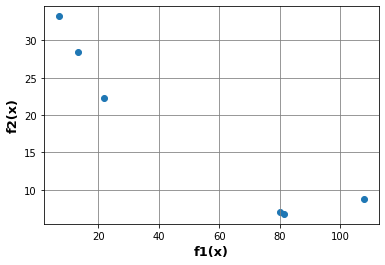

[43.37746264 17.26362319]
aceito
[43.37746264 17.26362319]
aceito
[45.64329767 15.88399468]
aceito
[47.80350996 14.77275917]
[44.92067178 16.00595865]
[45.64329767 15.88399468]
aceito
[45.93736223 15.72254955]
[43.23990892 17.35643781]
aceito
[43.23990892 17.35643781]
aceito
[43.23990892 17.35643781]
aceito
[41.72416312 18.46842911]
aceito
[40.00711748 18.7633439 ]
aceito
[39.89635305 18.78298453]
aceito
[41.72416312 18.46842911]
[39.13911105 18.91933408]
aceito
[41.72416312 18.46842911]
[38.53796623 19.03021307]
aceito
[18.00899477 25.01477493]
aceito
[17.58694862 25.21292815]
aceito
[18.10463735 24.97059863]
[15.71922459 26.15971091]
aceito
[16.55090664 25.72310636]
aceito
[12.01693135 28.49892585]
aceito
[18.10040193 24.97254935]
[10.70434537 29.5553137 ]
aceito
[13.58405343 27.41565373]
aceito
[13.14054861 27.7775477 ]
aceito
[14.12249658 27.00027627]
[13.51710843 27.53982749]
aceito
[14.5268543  26.74176637]
[12.70430575 28.06304933]
aceito
[19.06862511 24.71123899]
aceito
[18.967

/home/tiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars



menor
[ 0. 50.]
aceito
menor
[2.89685471e-02 4.91562347e+01]
[ 0.08105162 48.59678459]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.45075445e-02 4.89562863e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.32871693 47.2154872 ]
[ 1.55207811 44.15889818]
[ 0. 50.]
aceito
menor
[ 0.40895101 46.90477389]
[ 0. 50.]
aceito
menor
[2.78275889e-02 4.91728767e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor


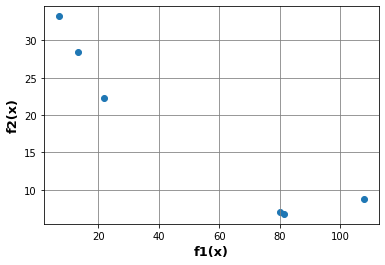

[ 0. 50.]
aceito
menor
[ 0.26366076 47.49851982]
[ 0.34939345 47.13187273]
[ 0. 50.]
aceito
menor
[ 0.1047872  48.40765422]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.26023271 47.5144077 ]
[ 0.08245135 48.5848957 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.54730642 46.43781857]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.72004471 45.93723878]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.55647455e-02 4.93800974e+01]
[ 0.05126098 48.88077085]
[ 0. 50.]
aceito
menor
[ 0.11562017 48.3287567 ]
[ 1.56078456 44.14362797]
[2.43165256e-02 4.

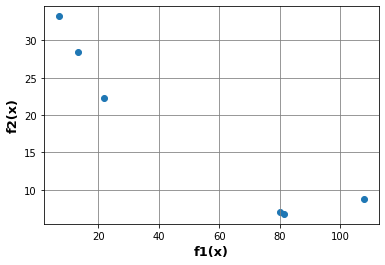

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[11.41103882 35.96264513]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.09207575 48.50581963]
[ 0.44093413 46.79008998]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.34007968e-02 4.92409843e+01]
[ 0. 50.]
aceito
menor
[7.46440106e-04 4.98635813e+01]
[2.97197337e-02 4.91454593e+01]
[ 0. 50.]
aceito
menor
[ 0.21912181 47.71425802]
[ 0.75393332 45.84701664]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.63590056e-03 4.97981776e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.43369866e-02 4.94048985e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
men

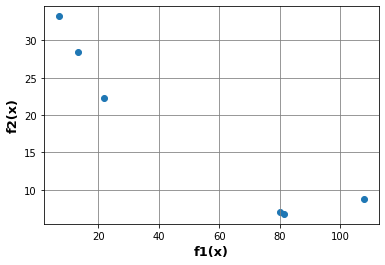

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.164408   48.01373917]
[ 1.05763792 45.12233325]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.06977523 48.69669376]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.19682459 47.83096026]
[4.66551043e-02 4.89316741e+01]
[3.75452981e-02 4.90405559e+01]
[9.37987714e-03 4.95180961e+01]
[ 0. 50.]
aceito
menor
[ 1.27907731 44.66495432]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.1898468  47.86889104]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[6.02692189e-03 4.96133405e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[6.81048041e-03 4.95890744e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.81102123e-02 4.90334357e+01]
[ 0.22757599 47.67164776]
[ 0.6

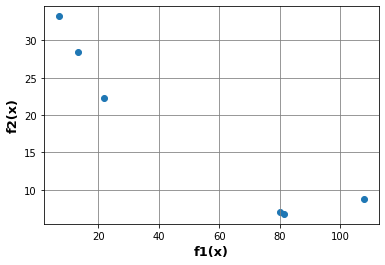

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.65198083 43.98652488]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.72558575e-02 4.93475062e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 4.25659634 40.74838889]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[7.84586102e-03 4.95590771e+01]
[ 0.87655545 45.53791187]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.16225076 48.02654457]
[4.36270608e-03 4.96708368e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.45612614 46.73717597]
[ 0.05751798 48.81523418]
[ 0. 50.]
aceito
menor
[ 0.3894035 46.9772407]
[ 0. 50.]
aceito
menor
[ 0.67057516 46.0732111 ]
[ 0.33093487 47.20638678]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.71133331e-02 4.89264980e+01]
[4.69042033e-02 4.8

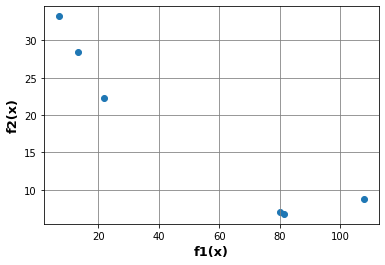

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.83761492 45.6333385 ]
[ 0. 50.]
aceito
menor
[ 0.08611491 48.5542616 ]
[ 2.28451294 43.01382558]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.18035786 47.92166148]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.77257268e-02 4.90382758e+01]
[ 0. 50.]
aceito
menor
[ 0.06158677 48.77456258]
[ 0.09988281 48.4447586 ]
[ 0.06853182 48.70820382]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.15165752 48.09075288]
[ 0.1052901  48.40390074]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.30975193 47.29466989]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.06802298 48.71294496]
[ 0.06665292 48.72580186]
[9.39554743e-03 4.95176957e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.78775847e-03 4.96932231e+01]
[ 1.47992733 44.28736863]
[ 0. 50.]
aceito
menor
[4.77780137e-03 4.96555862e+01]
[ 0. 

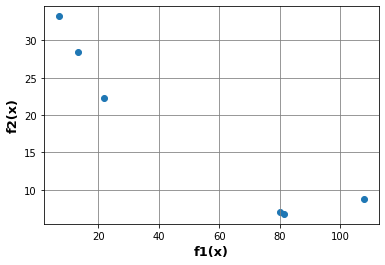

[ 0. 50.]
aceito
menor
[2.38444208e-02 4.92338792e+01]
[ 0. 50.]
aceito
menor
[ 0.86528126 45.56529552]
[ 0. 50.]
aceito
menor
[1.55675711e-02 4.93800415e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.86638094e-02 4.93215882e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.0584827  48.80546085]
[ 0. 50.]
aceito
menor
[ 0.22375136 47.69081965]
[ 0.30805987 47.30185791]
[1.13757164e-02 4.94695589e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.35276301 44.52277373]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.10852355 48.37998522]
[ 0. 50.]
aceito
menor
[1.44691705e-02 4.94021780e+01]
[ 0.06310787 48.75971298]
[ 0. 50.]
acei

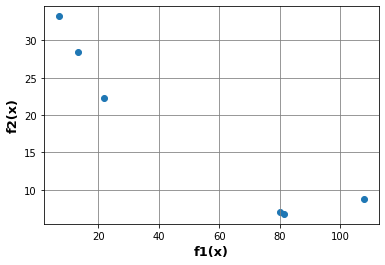

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.23324770e-04 4.99253356e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 9.02491271 37.23548194]
[8.37782580e-03 4.95444421e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.95659741 43.49522805]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.63282278 46.18069774]
[ 0. 50.]
aceito
menor
[ 0.3081411  47.30151234]
[ 0. 50.]
aceito
menor
[5.29377149e-03 4.96375319e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.76221210e-02 4.91759103e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.16284577e-02 4.89902545e+01]
[ 0.10361469 48.41644188]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.66989007e-05 4.99658434e+01]
[ 0.0588518

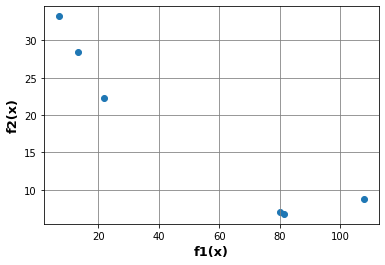

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.40465707 44.4252528 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.08981647 48.52398433]
[ 0.06129856 48.77739731]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.0610756  48.77959501]
[2.91214187e-05 4.99730251e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 2.38773168 42.87078951]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.54632370e-05 4.99702334e+01]
[1.24006857e-03 4.98242370e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.31081049 47.2901836 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.30430785 47.31787172]
[ 0. 50.]
aceito
menor
[ 0. 50.]

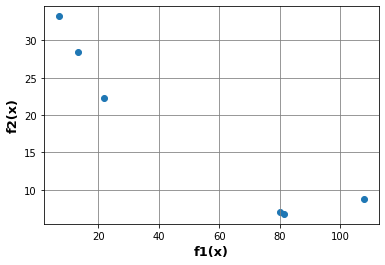

[ 0.16765058 47.99465483]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[8.59600666e-03 4.95385757e+01]
[3.13615413e-03 4.97207772e+01]
[ 0.64161799 46.15535147]
[ 0. 50.]
aceito
menor
[ 0.15663785 48.06028445]
[ 0. 50.]
aceito
menor
[ 3.93849026 41.06180762]
[ 3.43279356 41.59429862]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.47108121e-03 4.98085944e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.14641742e-02 4.89922284e+01]
[ 0. 50.]
aceito
menor
[ 1.85408402 43.65528332]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.47058464e-03 4.98086266e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.26372649e-02 4.94410814e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.45928649 46.72628767]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 

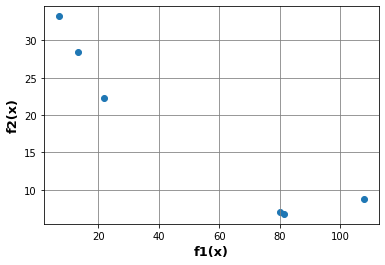

[ 0.0829444  48.58073263]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[5.40673391e-03 4.96336992e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.05203505 48.87244911]
[ 0. 50.]
aceito
menor
[ 0.05829107 48.80739557]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.79437931 45.74219686]
[ 0. 50.]
aceito
menor
[7.52302607e-05 4.99566511e+01]
[ 0.0639693 48.7513847]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.58373246 46.32581382]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.86529422 43.63753482]
[ 0. 50.]
aceito
menor
[5.63305324e-03 4.96261399e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.22300817 47.69456498]
[ 0. 50.]
aceito
menor
[3.33164892e-03 4.97122307e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 5.61740744 39.5538166 ]
[ 0.05665146 48.824

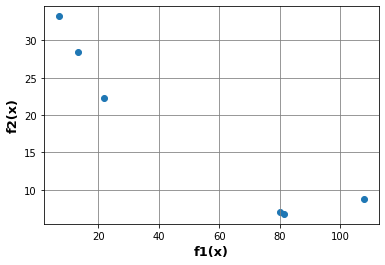

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.68650786 46.02883848]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.14763397e-03 4.96790263e+01]
[ 2.23094016 43.089569  ]
[5.64347243e-03 4.96257956e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.20125459 47.80724328]
[ 0. 50.]
aceito
menor
[1.27223594e-03 4.98219760e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.30745207 47.30444499]
[ 0.30587806 47.31115732]
[ 0. 50.]
aceito
menor
[ 0.37543256 47.03023054]
[ 0.96746081 45.32388591]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.02956150e-04 4.99130476e+01]
[ 0.34121149 47.16463731]
[ 0.31962249 47.2531

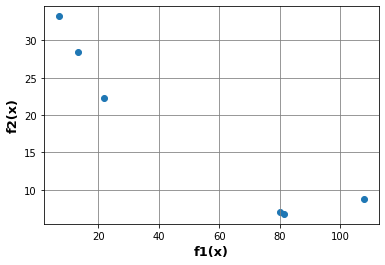

[ 0. 50.]
aceito
menor
[ 0.07166234 48.67942445]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.18913157 47.87281989]
[2.54177220e-02 4.92092076e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.24089466e-02 4.92571213e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[8.97502191e-03 4.95285608e+01]
[ 0. 50.]
aceito
menor
[2.25673602e-02 4.92545200e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.1324496 48.2134311]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.24180844 47.60175102]
[ 0.29151284 47.37328175]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.32169723e-02 4.90970280e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[8.05272834e-05 4.99551516e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.63154152e-02 4.93654198e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.87939571 45.53104389]
[

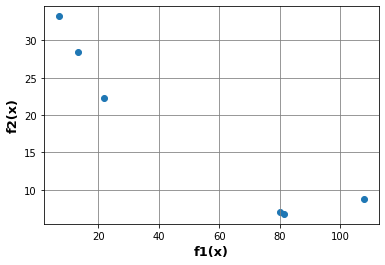

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.16490581e-03 4.98296376e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[5.32700717e-03 4.96364000e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.0646366  48.74497271]
[ 0. 50.]
aceito
menor
[2.13795904e-03 4.97693441e+01]
[ 0. 50.]
aceito
menor
[ 0.1044365  48.41027733]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.31105826 47.2891347 ]
[ 0.13955983 48.16700462]
[ 0.10268114 48.42347541]
[ 0. 50.]
aceito
menor
[ 0.06032193 48.78705436]
[ 0.36942194 47.05335095]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[6.01867491e-04 4.98774855e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.36869270e-05 4.99815055e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.91116331e-02 4.93135538e+01]
[ 1.0

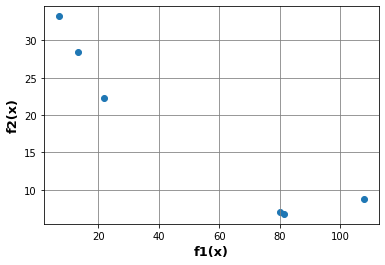

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.28812576 47.38816407]
[ 0.35539469 47.10809922]
[ 0.18718264 47.88356523]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.54281964 44.17519036]
[4.10053995e-02 4.89977619e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[9.48504605e-03 4.95154153e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[9.36437295e-03 4.95184926e+01]
[1.72425493e-02 4.93477562e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.65023881 46.13069038]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.12614279 48.25570642]
[1.28375085e-03 4.98211736e+01]
[ 0. 50.]
aceito
menor
[ 0.29076461 47.37656149]
[ 0. 50.]
acei

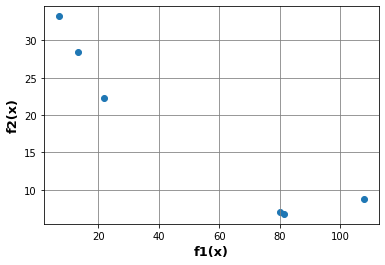

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.27221792 47.45932911]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.01932006 45.20676092]
[ 0. 50.]
aceito
menor
[ 0.1511714  48.09375453]
[ 0. 50.]
aceito
menor
[3.81991509e-02 4.90323196e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.57849357e-02 4.92035618e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.31460936 47.27414988]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.52263609 44.21090196]
[ 0.18037336 47.92157412]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
meno

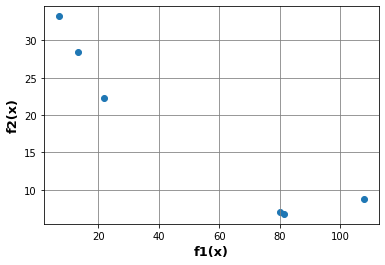

[ 0. 50.]
aceito
menor
[ 0.49567889 46.60369641]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.12339897 48.27444029]
[8.51357265e-04 4.98543227e+01]
[ 0. 50.]
aceito
menor
[ 3.69831243 41.30907964]
[ 2.6197576  42.56210677]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[5.15562453e-05 4.99641116e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.18084093 47.91894045]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.14438863e-02 4.91212398e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.06694982 48.7230043 ]
[ 3.1088443  41.96125353]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.60723304e-02 4.91991717e+01]
[ 0. 50.]
aceito
menor
[ 3.02865905 42.05564327]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.00710719e-02 4.95007441e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
a

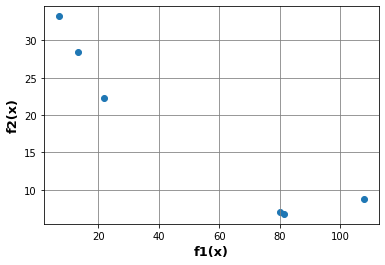

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.5422995 46.4535255]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.13090519 48.22368521]
[4.06811764e-02 4.90016915e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.29773503 47.34617868]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.13881936 48.17178132]
[ 4.73525087 40.30349692]
[ 0.43847066 46.79876182]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.38101953 44.46941552]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.06904456 48.70344452]
[ 0. 50.]
aceito
menor
[ 0.57657438 46.34751883]
[ 0. 50.]
aceito
menor
[ 0.13415573 48.2021751

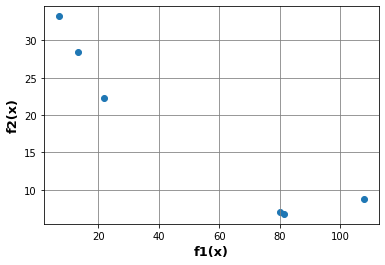

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[8.64939834e-03 4.95371516e+01]
[ 9.60936841 36.90285146]
[ 0. 50.]
aceito
menor
[ 0.77188806 45.80011402]
[ 0.14930278 48.1053398 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.32411279e-02 4.90967028e+01]
[ 2.69545547 42.4649427 ]
[ 0. 50.]
aceito
menor
[1.44029309e-02 4.94035397e+01]
[1.00172595e-03 4.98420002e+01]
[ 0. 50.]
aceito
menor
[9.60918146e-03 4.95122701e+01]
[2.66427269e-03 4.97425831e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.79098229e-02 4.89175618e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.09945929 48.44800647]
[ 0.40031123 46.93657014]
[ 0.33138031 47.20456298]
[3.4339944e-02 4.9082033e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.50490867 46.57338087]
[4.08868012e-04 4.98989998e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.04253706 45.15539906]
[ 0. 50.]
aceito
men

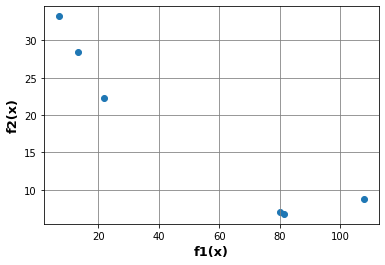

[ 1.31594472 44.59325449]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.33607448e-02 4.94253967e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[5.88734336e-03 4.96178267e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.20632151e-02 4.91127056e+01]
[ 1.03956431 45.16193974]
[ 0.23042748 47.65746374]
[ 0. 50.]
aceito
menor
[ 0.14146807 48.15475496]
[2.34065118e-02 4.92408923e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.18063694 47.920089  ]
[1.35041811e-02 4.94223386e+01]
[ 0. 50.]
aceito
menor
[6.31346698e-03 4.96042917e+01]
[4.50642425e-03 4.96654771e+01]
[ 0.0614369  48.77603581]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.06041883 48.7860926 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.09847822 48.45555759]
[ 0.13192195 48.21692743]
[ 0. 50.]
aceito
menor
[1.03264438e-03 4.98395842e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.

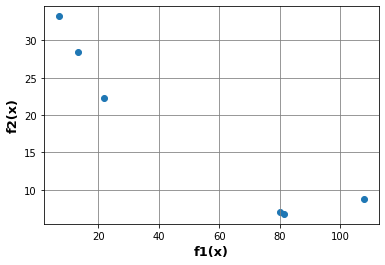

[ 0.39367546 46.96124076]
[2.13060766e-02 4.92754965e+01]
[ 0. 50.]
aceito
menor
[ 0.70157717 45.98738411]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.07952906 48.6098374 ]
[ 0.10700026 48.39120536]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.96413674e-03 4.96489579e+01]
[1.92354910e-02 4.93113485e+01]
[ 0.30273554 47.32461345]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.31938527e-02 4.92443221e+01]
[ 0.40896116 46.90473672]
[1.27037143e-02 4.94396222e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.12055007 48.29412147]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.43337065e-02 4.94049661e+01]
[ 0.05852984 48.80498544]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.05496217 48.84153989]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.46097154e-02 4.92217782e+01]
[ 0. 50.]
ace

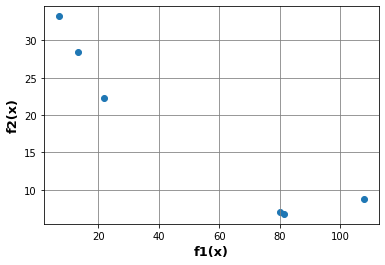

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.22819457 47.6685629 ]
[ 2.79593557 42.33845823]
[ 0. 50.]
aceito
menor
[ 0.57152255 46.36292513]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.79229609 43.75424086]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.17376508 47.9591843 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.34156233 47.16322389]
[ 0. 50.]
aceito
menor
[1.26790968e-02 4.94401623e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.08047401 48.60172141]
[1.80043687e-02 4.93335993e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.90663773 45.46578311]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.07628284 48.63810328]
[1.62124240e-04 4.99363765e+01]
[ 0

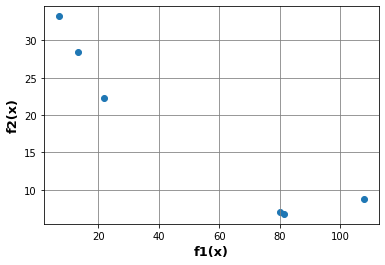

[ 0. 50.]
aceito
menor
[9.71416437e-06 4.99844187e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.66737479 46.08219319]
[ 1.23926786 44.74369655]
[ 0. 50.]
aceito
menor
[1.17799715e-02 4.94602671e+01]
[1.03403602e-03 4.98394764e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.10746845e-02 4.94765870e+01]
[ 0. 50.]
aceito
menor
[7.87955933e-04 4.98598442e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.13048001 48.22651916]
[1.01288797e-02 4.94993205e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.11409913 48.33959663]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.43294276 46.81831638]
[ 0. 50.]
aceito
menor
[ 0. 50.]
a

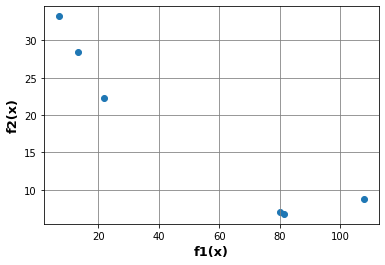

[ 0.08626291 48.55303834]
[9.87619146e-03 4.95055739e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.71071755 45.96247611]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 3.38466847 41.64743287]
[ 0.41720068 46.8747465 ]
[ 1.00085428 45.24807832]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[9.51212865e-03 4.95147273e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.92311097 45.42684454]
[ 1.10647625 45.01716033]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.12453243 48.26667548]
[ 0.21717571 47.72418818]
[ 0.08538816 48.56028441]
[ 0.06354711 48.75545916]
[ 0.10253252 48.42459815]
[ 0. 50.]
aceito
menor
[ 0.26845512 47.47648105]
[ 0. 50.]
aceito
menor
[2.87504123e-02 4.91593903e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.938659   45.39044397]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.06189848 48.77150435]
[9.61533

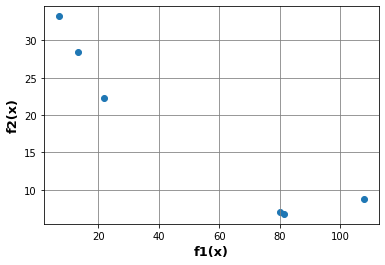

[ 0. 50.]
aceito
menor
[ 1.26037849 44.70176564]
[1.75173523e-02 4.93426137e+01]
[ 0. 50.]
aceito
menor
[6.76936695e-03 4.95903115e+01]
[ 0. 50.]
aceito
menor
[ 0.8776755  45.53520202]
[ 2.31220843 42.97507829]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.32616697 47.22599025]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.35573815 47.1067451 ]
[ 0. 50.]
aceito
menor
[16.85556796 33.68612545]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.17141466 47.97274098]
[ 0. 50.]
aceito
menor
[ 0.61812234 46.22349273]
[3.67442981e-02 4.90507460e+01]
[ 0. 50.]
aceito
menor
[ 0.072386   48.67286413]
[ 0. 50.]
aceito
menor
[ 1.10063175 45.02960803]
[ 0. 50.]
aceito
menor
[ 0.2070259  47.77675153]
[ 0.28527188 47.4007755 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.52652194 46.50353889]
[ 0. 50.]
aceito
menor
[ 0.09748333 4

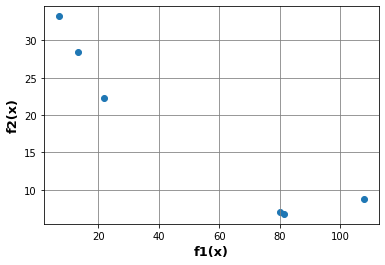

[ 0. 50.]
aceito
menor
[ 0.10773414 48.38578959]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.56096661 46.39535645]
[ 0.13862603 48.17303064]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.09956982e-02 4.91274692e+01]
[ 0.06708565 48.72172651]
[ 0.14955419 48.10377672]
[1.66117088e-02 4.93597208e+01]
[ 0.18316748 47.90588835]
[ 0.23643705 47.62786961]
[4.37821075e-02 4.89647368e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.10831238 48.3815358 ]
[ 0. 50.]
aceito
menor
[ 1.67166677 43.95326903]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.25375754e-02 4.94432778e+01]
[3.27281995e-02 4.91036352e+01]
[ 0.38395783 46.99777291]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.80308694e-03 4.96926049e+01]
[ 0.11984577 48.29902405]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.25224816 47.

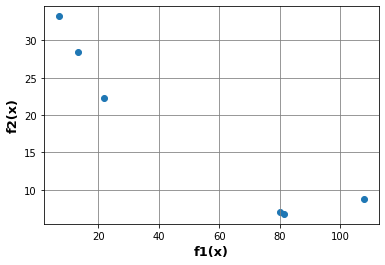

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.35328615 47.11642758]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[7.49607361e-04 4.98632926e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.11061418 48.36471805]
[ 0.09624445 48.47289662]
[9.89933185e-04 4.98429315e+01]
[ 0. 50.]
aceito
menor
[ 0.66257194 46.09571688]
[ 0. 50.]
aceito
menor
[ 0.12558874 48.25947213]
[ 0. 50.]
aceito
menor
[ 0.378377   47.01897643]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.00845064e-03 4.97764234e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.18341764 47.90449014]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.481608

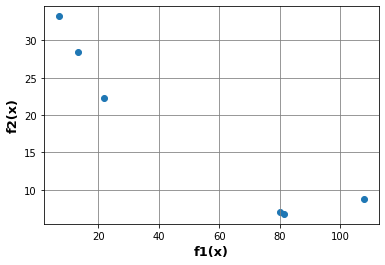

[ 0. 50.]
aceito
menor
[ 1.33060803 44.56505278]
[ 0. 50.]
aceito
menor
[1.21815736e-03 4.98257940e+01]
[ 0. 50.]
aceito
menor
[ 0.38065642 47.01029612]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.43376957 46.81538315]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.55815485e-02 4.92066837e+01]
[ 1.04640875 45.14689606]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.28009635e-02 4.92507008e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 2.1185193  43.25206276]
[ 0. 50.]
aceito
menor
[1.45560682e-04 4.99397121e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.06441501e-02 4.90021413e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
men

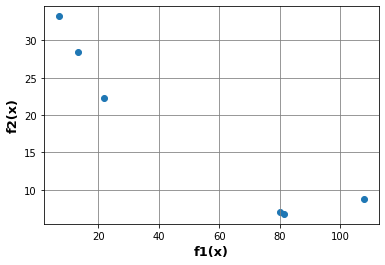

[ 0. 50.]
aceito
menor
[ 2.6183618  42.56391402]
[ 0.90310319 45.47418872]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.97226839e-02 4.91454173e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.07566364e-03 4.97727217e+01]
[4.22959458e-02 4.89822751e+01]
[ 0. 50.]
aceito
menor
[ 0.68793448 46.02489283]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.93778541 45.39248031]
[ 0.24684028 47.57755893]
[ 0.06231824 48.76739849]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.75536828e-02 4.93419369e+01]
[ 0. 50.]
aceito
menor
[ 0.15198886 48.08870975]
[ 9.14727029 37.16459032]
[ 0.16664513 48.00055173]
[ 0.06852899 48.7082301 ]
[7.88840490e-03 4.95578886e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.78968262e-02 4.93355791e+01]
[ 0. 50.]
aceito
menor
[ 0.25901754 47.5200661 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.11284583 48.34858476]
[ 1.28953491 44.6444992 ]
[ 0. 50.]


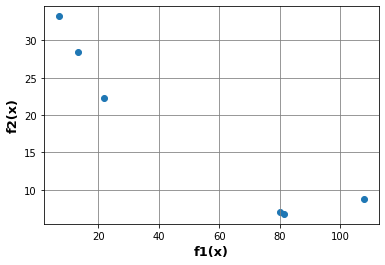

[ 0.55249811 46.4216137 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.27150171 47.46258414]
[3.11694685e-02 4.91250485e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 3.78047651 41.22339537]
[ 0.15622166 48.06281115]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 3.49441427 41.52692733]
[1.50997737e-02 4.93893693e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.72224362e-02 4.90446498e+01]
[3.53520143e-02 4.90687314e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.04601066e-03 4.96829702e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
men

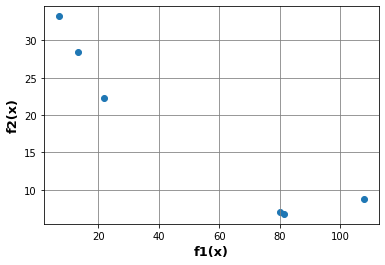

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.50485924 46.57354243]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.34332525 47.15613318]
[ 4.70505584 40.33069362]
[ 0. 50.]
aceito
menor
[ 0.10622037 48.39698176]
[ 0.08761533 48.5419095 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.32124399 47.24639148]
[4.54686211e-02 4.89451985e+01]
[ 3.00545672 42.08323763]
[ 0.48452444 46.6407416 ]
[ 0. 50.]
aceito
menor
[4.28586986e-04 4.98965954e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.66467474e-02 4.93590503e+01]
[ 0. 50.]
aceito
menor
[ 0.86599973 45.56354461]
[ 0. 50.]
aceito
menor
[4.61130246e-02 4.89378311e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito


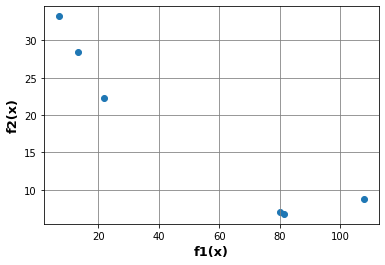

[4.99968861e-04 4.98883251e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.99867351e-02 4.92981244e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.23722444 47.62402151]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[9.68488283e-03 4.95103622e+01]
[ 2.10858532 43.26666198]
[ 2.25632694 43.05354423]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.51499347e-02 4.93883621e+01]
[1.28080647e-03 4.98213784e+01]
[ 0. 50.]
aceito
menor
[ 1.00404526 45.24090837]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.28559713 47.39933485]
[ 0. 50.]
aceito
menor
[ 0.28699815 47.39313913]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito


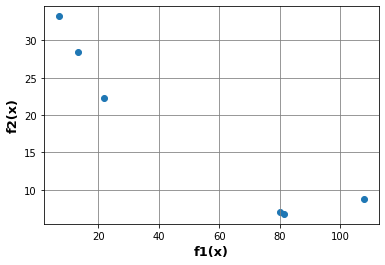

[ 0. 50.]
aceito
menor
[2.29152596e-02 4.92488395e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.29131882 47.37413178]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.63838133e-02 4.90553689e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.58558562e-02 4.93743638e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.2599528  47.51570988]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.86292627 45.57104032]
[ 0.20595092 47.78239697]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.51842959 46.52950466]
[ 0. 50.]
aceito
menor
[ 0.25227663 47.55171179]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 8.50357419 37.54544929]
[2.19750221e-02 4.92642950e+01]
[ 0. 50.]
aceito
menor
[ 0.65490467 46.11741715]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.21349679 47.74308856]
[ 1.72195776 43.8

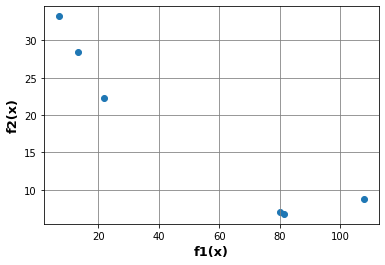

[3.11957164e-02 4.91246835e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.22769925 47.67103266]
[ 0. 50.]
aceito
menor
[4.12972687e-04 4.98984946e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.81333649 45.69407563]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.9950183  45.26122438]
[ 0. 50.]
aceito
menor
[ 0.36814448 47.05829058]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.98111053 45.29272645]
[3.66485153e-02 4.90519720e+01]
[ 0. 50.]
aceito
menor
[2.92686726e-03 4.97302291e+01]
[ 0.07335587 48.66412452]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.19991329 47.8143951 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.28198755e-03 4.98212962e+01]
[ 0. 50.]
acei

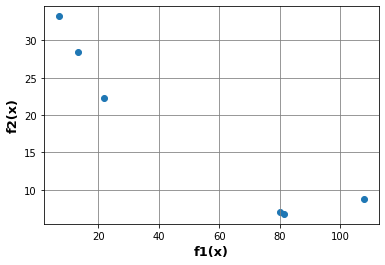

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.03734498e-02 4.91361943e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.59920282 46.2793911 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.93735009 43.52490132]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.67362305 46.06467863]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[9.04039130e-03 4.95268552e+01]
[1.73817765e-02 4.93451456e+01]
[ 0.57240451 46.36023017]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.25986754 47.51610664]
[ 0. 50.]
aceito
menor
[ 0.07999296 48.60584689]
[ 0. 50.]
aceito
menor
[ 0.19159068 47.85934403]
[ 0.10965575 48.37169847]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.17568666 47.94817206]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0

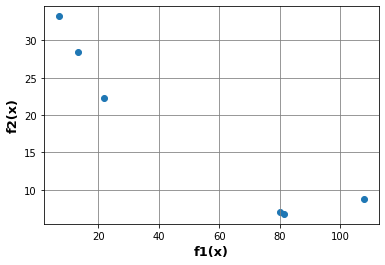

[ 0.8780722  45.53424272]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.11443024 48.33723061]
[13.06788973 35.19220429]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.68393876e-02 4.93553765e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.05314533 48.86062276]
[ 0.07811104 48.62211013]
[ 0.32074645 47.24846252]
[ 0. 50.]
aceito
menor
[8.08030081e-03 4.95525676e+01]
[ 0. 50.]
aceito
menor
[ 0.06867234 48.70689771]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.12319096 48.27586927]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.64235148e-03 4.97436415e+01]
[ 0.10322957 48.41933942]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.7302210e-02 4.8924372e+01]
[ 0. 50.]
aceito
me

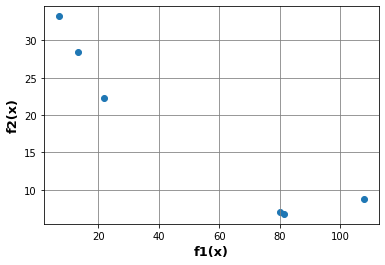

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.63645257 46.17021426]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.64136335e-02 4.93635249e+01]
[4.60326603e-03 4.96619140e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.15809287 48.05147849]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 4.4004971  40.61144336]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.78050153 45.7778255 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.1328817  48.21057333]
[3.23021937e-02 4.91094350e+01]
[3.97475568e-02 4.90130974e+01]
[ 0.73750146 45.8904801 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.29117904e-03 4.97612415

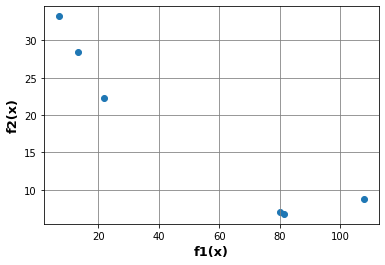

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.71009452e-04 4.99037847e+01]
[ 0.2938739  47.36296161]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.91746093e-03 4.97815353e+01]
[ 0. 50.]
aceito
menor
[ 0.42196667 46.8575436 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.19765112e-02 4.92642703e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.12870284 48.23841682]
[ 0. 50.]
aceito
menor
[8.87753595e-03 4.95311160e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.16461911 48.01249072]
[ 0. 50.]
aceito
menor
[ 0.27530796 47.44533712]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.74935812 45.85906586]
[ 0.62417405 46.20580918]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.61882751 46.22142737]
[1.15325953e-02 4.94659335e+01]
[ 0.31138981 47.28773181]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.

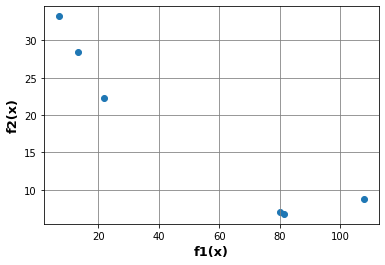

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.48651632 44.2754903 ]
[ 0. 50.]
aceito
menor
[ 0.20543014 47.78513745]
[ 0. 50.]
aceito
menor
[4.96522996e-03 4.96489194e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 3.72778843 41.27820634]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.44439383 46.77795492]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.08976516 48.52439955]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.3488199  47.13415613]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.17177404e-02 4.89891834e+01]
[ 0.0762753  48.63816962]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.15287068 48.08328366]
[7.84452983e-05 4.99557349e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 2.47764365 42.74914463]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0

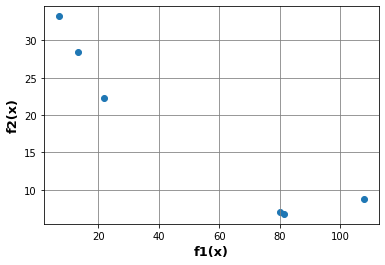

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.0527724  48.86458087]
[ 0. 50.]
aceito
menor
[ 1.12436876 44.97927939]
[6.20099963e-03 4.96078181e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.04276473e-02 4.92904803e+01]
[ 0. 50.]
aceito
menor
[2.61478613e-02 4.91980219e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.13814588 48.17613743]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.06322066 48.75861924]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 2.04291593 43.36419848]
[ 0.08912712 48.52957349]
[ 0.31188312 47.28564594]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[2.70199225e-02 4.91848681e+01]
[ 0. 50.]
aceito
menor
[2.43279690e-02 4.92262107e+01]
[ 0. 50.]
aceito
menor
[2.24865183e-0

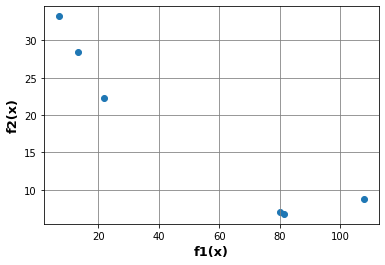

[ 0. 50.]
aceito
menor
[ 0.16084396 48.03494319]
[ 0.12514676 48.26248227]
[1.99191141e-02 4.92993043e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.15537101e-03 4.98303351e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.05747242 48.81569783]
[ 3.73423854 41.27147066]
[4.240618e-03 4.967546e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[5.65887935e-04 4.98811995e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[4.75670748e-02 4.89213979e+01]
[ 0. 50.]
aceito
menor
[1.15893316e-02 4.94646285e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 3.41015787 41.61923309]
[4.49050175e-04 4.98941582e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.69871607 45.99521711]
[ 0. 50.]
aceito
menor
[ 0.30614338 47.31002459]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.78271826e-03 4.96934266e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
acei

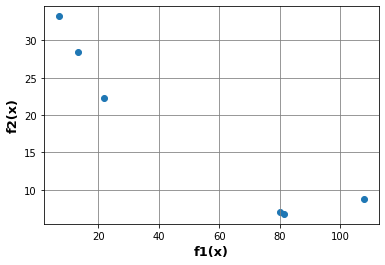

[ 0. 50.]
aceito
menor
[3.61595568e-02 4.90582566e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.64368739 46.14941529]
[ 0. 50.]
aceito
menor
[ 0.27685004 47.43838547]
[1.21893839e-02 4.94510196e+01]
[ 0.12472501 48.26535983]
[ 0.27832498 47.43175555]
[ 0.05929768 48.79726872]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 1.28291112 44.65744446]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.3582922  47.09669736]
[ 0. 50.]
aceito
menor
[4.28327822e-02 4.89759041e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.64408777e-02 4.93630003e+01]
[1.43339388e-02 4.94049613e+01]
[ 0. 50.]
aceito
menor
[ 0.06723766 48.72029811]
[ 0.46350086 46.71183036]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[3.27237586e-02 4.91036955e+01]
[ 0.19319063 47.85062484]
[ 0. 50.]
aceito
me

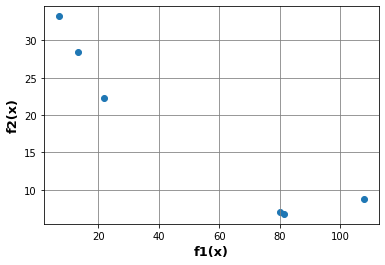

[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.1596551  48.04207059]
[ 0. 50.]
aceito
menor
[ 0.11023627 48.36746671]
[2.14741906e-04 4.99267833e+01]
[ 0.27400887 47.4512094 ]
[ 0. 50.]
aceito
menor
[ 0.43570024 46.80854537]
[ 0. 50.]
aceito
menor
[ 1.35224505 44.52375767]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[1.11616140e-02 4.94745477e+01]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.12230199 48.2819904 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.49182541 46.61644309]
[ 1.56157165 44.14224989]
[ 0. 50.]
aceito
menor
[ 0.19777677 47.82583916]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0.05563887 48.83451509]
[ 0. 50.]
aceito
menor
[ 0.07754749 48.62701934]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 4.25479618 40.7501204 ]
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0. 50.]
aceito
menor
[ 0

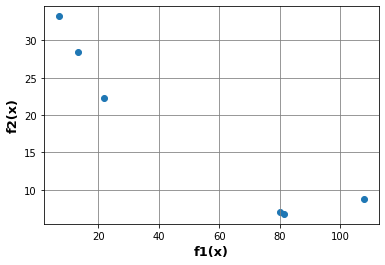

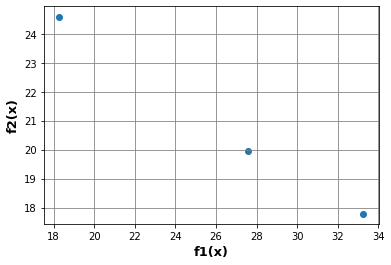

CPU times: user 32.7 s, sys: 8.07 s, total: 40.8 s
Wall time: 27.4 s


In [111]:
%%time
repeat=1
cputime=np.zeros([repeat,2])
for i in range(repeat):
    Tmax=100
    Tmin=0.1
    N=300
    alpha=0.85
    HL=100
    SL=200
    nof=2
    nov=2
    start=time.time()
    archive1=coannealing(Tmax,Tmin,N,alpha,SL,HL,nof,nov)
    end=time.time()
    plotf(archive1,nof, i)
    cputime[i][0]=end-start
    cputime[i][1]=cputime[i][0]/60
#np.savetxt("tempo.csv", cputime, delimiter=",")

In [112]:
#plotf(archive1,2,1)